In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.integrate as scpi

import os 
import logging as _logging

import cbmos
import cbmos.force_functions as ff
import cbmos.solvers.euler_forward as ef
import cbmos.cell as cl

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0, 
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large', 
          'ytick.labelsize':'xx-large', 
          'legend.fontsize': 'xx-large', 
          'font.size': 11, 
          'font.family': 'serif', 
          'mathtext.fontset': 'dejavuserif', 
          'axes.titlepad': 12, 
          'axes.labelpad': 12}
plt.rcParams.update(params)

In [2]:
logger = _logging.getLogger()
logger.setLevel(_logging.DEBUG)

In [3]:
# Simulation parameters
s = 1.0    # rest length
tf = 20  # final time
rA = 1.5   # maximum interaction distance
dim = 2
#dim = 1
seed=67

dt = 0.05
t_data = [0,tf]

#force_names = ['cubic', 'pw. quad.', 'GLS']
force_names = ['cubic']

defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = {'cubic': defcolors[0], 'pw. quad.': defcolors[5], 'GLS': defcolors[6]}

# Solvers
models_ef = {'pw. quad.': cbmos.CBModel(ff.PiecewisePolynomial(), ef.solve_ivp, dim), 
             'cubic': cbmos.CBModel(ff.Cubic(), ef.solve_ivp, dim),
             'GLS': cbmos.CBModel(ff.Gls(), ef.solve_ivp, dim)}
#models_ef = {'pw. quad.': cbmos.CBModel(ff.PiecewisePolynomial(), ef.solve_ivp, dim), 
#             'cubic': cbmos.CBModel(ff.Cubic(), ef.solve_ivp, dim),
 #            'GLS': cbmos.CBModel(ff.LinearExponential(), ef.solve_ivp, dim)}

In [4]:
# parameters fitted to relaxation time t=1.0h
params_cubic = {"mu": 5.70, "s": s, "rA": rA}
muR = 9.1
ratio = 0.21
params_poly = {'muA': ratio*muR, 'muR': muR, 'rA': rA, 'rR': 1.0/(1.0-np.sqrt(ratio)/3.0), 'n': 1.0, 'p': 1.0}
mu_gls=1.95
params_gls = {'mu': mu_gls, 'a':-2*np.log(0.002/mu_gls)}
params = {'cubic': params_cubic, 'pw. quad.': params_poly, 'GLS': params_gls}
filename_ending = {'cubic': '_cubic', 'pw. quad.': '_pwq', 'GLS': '_gls'}

In [5]:
cell_list = [cl.Cell(0, [0, 0], proliferating=False), cl.Cell(1, [0.3, 0], proliferating=False)]

In [6]:
force = 'cubic'
eps = 0.01
ts, history = models_ef[force].simulate(cell_list, t_data, params[force], {"eps": eps, 'jacobian': models_ef[force].jacobian, 'force_args': params[force]}, seed=seed)


DEBUG:root:Starting new simulation
DEBUG:root:Calling solver with: t0=0, tf=20
DEBUG:root:Using EF, global adaptive time stepping with Jacobian and eps=0.01
DEBUG:root:t=0.0
DEBUG:root:t=0.009892762462733311
DEBUG:root:t=0.02335652657770652
DEBUG:root:t=0.04208873222040249
DEBUG:root:t=0.06883781261414759
DEBUG:root:t=0.10825824623582525
DEBUG:root:t=0.16871484967544267
DEBUG:root:t=0.2666085783943475
DEBUG:root:t=0.43943629395769035
DEBUG:root:t=0.8134780274967224
DEBUG:root:t=1.542504423627972
DEBUG:root:t=2.2176429598461587
DEBUG:root:t=2.946649010740582
DEBUG:root:t=3.6218069185278523
DEBUG:root:t=4.350792669499767
DEBUG:root:t=5.025969906423106
DEBUG:root:t=5.754935402619069
DEBUG:root:t=6.430131926400462
DEBUG:root:t=7.159077212800135
DEBUG:root:Stopped updating Jacobian at t=7.159077212800135. Using dt_s=0.7020715986465205
DEBUG:root:t=7.861148811446656
DEBUG:root:t=8.563220410093177
DEBUG:root:t=9.265292008739697
DEBUG:root:t=9.967363607386218
DEBUG:root:t=10.66943520603274
DEB

In [7]:
eps = 0.01
ts, history = models_ef[force].simulate(cell_list, t_data, params[force], {"eps": eps, 'jacobian': models_ef[force].jacobian, 'force_args': params[force], 'local_adaptivity': True}, seed=seed)


DEBUG:root:Starting new simulation
DEBUG:root:Calling solver with: t0=0, tf=20
DEBUG:root:Using EF, local adaptive time stepping with eps=0.01, eta=0.001, m0=2 and m1=2
DEBUG:root:t=0.0
DEBUG:root:Two levels, K_1 empty. i_min^1=2, i_min^2=2, dt_0=0.0049463812313666556, dt_2=0.019785524925466622
DEBUG:root:y=[-0.11367971  0.          0.41367971  0.        ]
DEBUG:root:t=0.019785524925466622
DEBUG:root:Two levels, K_1 empty. i_min^1=2, i_min^2=2, dt_0=0.00960474043670063, dt_2=0.03841896174680252
DEBUG:root:y=[-0.21159629  0.          0.51159629  0.        ]
DEBUG:root:t=0.05820448667226914
DEBUG:root:Two levels, K_1 empty. i_min^1=2, i_min^2=2, dt_0=0.021112589639069066, dt_2=0.08445035855627626
DEBUG:root:y=[-0.29200087  0.          0.59200087  0.        ]
DEBUG:root:t=0.1426548452285454
DEBUG:root:Two levels, K_1 empty. i_min^1=2, i_min^2=2, dt_0=0.057850035058888735, dt_2=0.23140014023555494
DEBUG:root:y=[-0.35005711  0.          0.65005711  0.        ]
DEBUG:root:t=0.374054985464100

In [8]:
import cbmos.utils as ut

In [12]:
coords = ut.generate_honeycomb_coordinates(7,7,0.8)
sheet = [cl.Cell(i, [x,y], 0.0, proliferating=False) for i, (x, y) in enumerate(coords)]


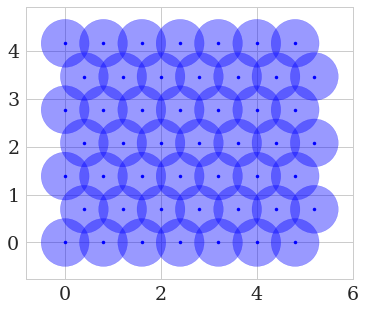

In [13]:
ut.plot_2d_population(sheet)

In [14]:
ts, history = models_ef[force].simulate(sheet, t_data, params[force], {"eps": eps, 'jacobian': models_ef[force].jacobian, 'force_args': params[force]}, seed=seed)


DEBUG:root:Starting new simulation
DEBUG:root:Calling solver with: t0=0, tf=20
DEBUG:root:Using EF, global adaptive time stepping with Jacobian and eps=0.01
DEBUG:root:t=0.0
DEBUG:root:t=0.050615977764423975
DEBUG:root:t=0.10840590212070869
DEBUG:root:t=0.1659713249786451
DEBUG:root:t=0.22436146100975946
DEBUG:root:t=0.28422175576777103
DEBUG:root:t=0.3460845875137797
DEBUG:root:t=0.41035280866530377
DEBUG:root:t=0.47735542947664933
DEBUG:root:t=0.547374080428074
DEBUG:root:t=0.6206523944907484
DEBUG:root:t=0.6973965153204977
DEBUG:root:t=0.7777794640262486
DEBUG:root:t=0.8619407198318473
DEBUG:root:t=0.9497403541343558
DEBUG:root:t=1.0409484591325893
DEBUG:root:t=1.1350462301419477
DEBUG:root:t=1.2319973796475525
DEBUG:root:t=1.3317946019771645
DEBUG:root:t=1.4344268845886874
DEBUG:root:t=1.539878889027735
DEBUG:root:t=1.6481304231763654
DEBUG:root:t=1.7591561978642334
DEBUG:root:t=1.8729257424327883
DEBUG:root:t=1.9894034184047018
DEBUG:root:t=2.1085485212886166
DEBUG:root:t=2.230315

In [15]:
ts, history = models_ef[force].simulate(sheet, t_data, params[force], {"eps": eps, 'jacobian': models_ef[force].jacobian, 'force_args': params[force], 'local_adaptivity': True}, seed=seed)


DEBUG:root:Starting new simulation
DEBUG:root:Calling solver with: t0=0, tf=20
DEBUG:root:Using EF, local adaptive time stepping with eps=0.01, eta=0.001, m0=2 and m1=2
DEBUG:root:t=0.0
DEBUG:root:Two levels, K_0 empty. i_min^1=0, i_min^2=12, dt_1=0.02896326229003547, dt_2=0.05792652458007094
DEBUG:root:y=[-0.04709449 -0.02552477  0.37052653  0.69448557 -0.06183122  1.38564065
  0.37052653  2.07846097 -0.06183122  2.77128129  0.37052653  3.46243637
 -0.04709449  4.18244671  0.80144215 -0.05354741  1.2         0.69448557
  0.80288429  1.38564065  1.2         2.07846097  0.80288429  2.77128129
  1.2         3.46243637  0.80144215  4.21046935  1.6        -0.05271479
  2.          0.69448557  1.6         1.38564065  2.          2.07846097
  1.6         2.77128129  2.          3.46243637  1.6         4.20963672
  2.4        -0.05271479  2.8         0.69448557  2.4         1.38564065
  2.8         2.07846097  2.4         2.77128129  2.8         3.46243637
  2.4         4.20963672  3.2       

DEBUG:root:t=0.353894341008102
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=0.3242954096233764, dt_s=0.06458495017807513, K=5
DEBUG:root:y=[-0.19546467 -0.11859519  0.26573568  0.63719164 -0.26085436  1.37454835
  0.25019465  2.07846097 -0.26085436  2.78237359  0.26573568  3.51973029
 -0.19546467  4.27551713  0.71696782 -0.19708077  1.14873145  0.60082004
  0.70926933  1.36316795  1.14915697  2.07846097  0.70926933  2.79375399
  1.14873145  3.5561019   0.71696782  4.35400271  1.57248186 -0.21537499
  1.98592809  0.59329874  1.57254763  1.35034816  1.9866467   2.07846097
  1.57254763  2.80657378  1.98592809  3.5636232   1.57248186  4.37229693
  2.39758635 -0.21901758  2.80368797  0.59264024  2.39676529  1.34909684
  2.8032826   2.07846097  2.39676529  2.8078251   2.80368797  3.5642817
  2.39758635  4.37593952  3.21809889 -0.21823009  3.62936511  0.59454726
  3.21381406  1.34919846  3.62774854  2.07846097  3.21381406  2.80772348
  3.62936511  3.5623746

DEBUG:root:t=0.7880090483531422
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=0.5808000107644283, dt_s=0.08462934588438313, K=5
DEBUG:root:y=[-0.30871321 -0.19688946  0.17027552  0.57488375 -0.3744594   1.34326121
  0.15475603  2.07846097 -0.3744594   2.81366073  0.17027552  3.58203819
 -0.30871321  4.3538114   0.62731148 -0.28752647  1.08305429  0.5222533
  0.6246157   1.3258813   1.08469899  2.07846097  0.6246157   2.83104064
  1.08305429  3.63466864  0.62731148  4.4444484   1.52069268 -0.32565703
  1.95756243  0.50357156  1.52273219  1.30418686  1.95858056  2.07846097
  1.52273219  2.85273508  1.95756243  3.65335038  1.52069268  4.48257897
  2.38864749 -0.33681359  2.81666652  0.50079295  2.38649857  1.29914553
  2.81528381  2.07846097  2.38649857  2.8577764   2.81666652  3.65612899
  2.38864749  4.49373553  3.25252524 -0.33352575  3.68251457  0.50830829
  3.24420998  1.30028362  3.67895538  2.07846097  3.24420998  2.85663832
  3.68251457  3.648613

  5.13530126  4.4762411 ]
DEBUG:root:t=1.3444117980700194
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=0.8609614099058673, dt_s=0.10298996524064863, K=5
DEBUG:root:y=[-0.40749571 -0.26953472  0.08942422  0.51664123 -0.45189008  1.30962072
  0.07640932  2.07846097 -0.45189008  2.84730121  0.08942422  3.64028071
 -0.40749571  4.42645666  0.54853126 -0.3573869   1.02609412  0.4629239
  0.55574664  1.29437874  1.02914733  2.07846097  0.55574664  2.8625432
  1.02609412  3.69399804  0.54853126  4.51430884  1.47366725 -0.40443827
  1.93280761  0.4382396   1.48221231  1.27037755  1.93457712  2.07846097
  1.48221231  2.88654439  1.93280761  3.71868234  1.47366725  4.56136021
  2.38015761 -0.42043666  2.82748431  0.43409154  2.37915403  1.26300719
  2.82504398  2.07846097  2.37915403  2.89391475  2.82748431  3.7228304
  2.38015761  4.57735859  3.28353471 -0.41574419  3.72773885  0.44521028
  3.27088802  1.26471807  3.72151311  2.07846097  3.27088802  2.8922038

  5.20640158  4.53398586]
DEBUG:root:t=2.004119537877274
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=1.1792748493666234, dt_s=0.11947936862170598, K=5
DEBUG:root:y=[-0.48400802 -0.3297955   0.02710496  0.46918316 -0.50458836  1.282751
  0.01831063  2.07846097 -0.50458836  2.87417093  0.02710496  3.68773878
 -0.48400802  4.48671744  0.48792588 -0.40882767  0.98160415  0.42099389
  0.50364391  1.2696587   0.9858689   2.07846097  0.50364391  2.88726324
  0.98160415  3.73592805  0.48792588  4.56574961  1.43730944 -0.45539821
  1.91337874  0.39521624  1.45097992  1.24722824  1.91583779  2.07846097
  1.45097992  2.9096937   1.91337874  3.7617057   1.43730944  4.61232015
  2.37333818 -0.4734562   2.83589197  0.39027674  2.37385155  1.23887138
  2.83284393  2.07846097  2.37385155  2.91805055  2.83589197  3.7666452
  2.37333818  4.63037814  3.30711598 -0.46817778  3.7629451   0.40283827
  3.29224192  1.24085778  3.75492163  2.07846097  3.29224192  2.91606416

  5.25749848  4.57763374]
DEBUG:root:t=2.7591529968245183
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=1.5442430008370776, dt_s=0.13433108906142927, K=5
DEBUG:root:y=[-0.53954643 -0.37758839 -0.0200471   0.43295556 -0.54152837  1.26259474
 -0.02396646  2.07846097 -0.54152837  2.8943272  -0.0200471   3.72396637
 -0.53954643  4.53451033  0.4437244  -0.4460255   0.94754659  0.39194826
  0.46494074  1.25104394  0.95304837  2.07846097  0.46494074  2.90587799
  0.94754659  3.76497368  0.4437244   4.60294743  1.41072183 -0.48730636
  1.89842914  0.36828219  1.4271362   1.23171017  1.90140813  2.07846097
  1.4271362   2.92521177  1.89842914  3.78863975  1.41072183  4.6442283
  2.36816497 -0.50487133  2.84222188  0.36329779  2.36992427  1.22368862
  2.83906939  2.07846097  2.36992427  2.93323332  2.84222188  3.79362415
  2.36816497  4.66179327  3.32398218 -0.49982334  3.78962314  0.3753474
  3.30898104  1.22557989  3.78079277  2.07846097  3.30898104  2.931342

  5.29268318  4.60935123]
DEBUG:root:t=3.5975118929674457
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=2.0245275993536467, dt_s=0.146765908943185, K=5
DEBUG:root:y=[-0.57788217 -0.41435315 -0.05496367  0.40659016 -0.56796927  1.24813807
 -0.05457828  2.07846097 -0.56796927  2.90878386 -0.05496367  3.75033178
 -0.57788217  4.57127509  0.41283328 -0.47203845  0.92206657  0.37258507
  0.43657263  1.23774398  0.92867509  2.07846097  0.43657263  2.91917795
  0.92206657  3.78433687  0.41283328  4.62896039  1.39204076 -0.50650319
  1.8871127   0.35241278  1.40923499  1.22174138  1.89053115  2.07846097
  1.40923499  2.93518056  1.8871127   3.80450915  1.39204076  4.66342513
  2.36440469 -0.52195886  2.84680951  0.34791323  2.36700015  1.21475783
  2.84391798  2.07846097  2.36700015  2.94216411  2.84680951  3.80900871
  2.36440469  4.6788808   3.3355545  -0.51763785  3.80928029  0.35839143
  3.3217789   1.21637499  3.80043287  2.07846097  3.3217789   2.940546

  5.31608941  4.63162151]
DEBUG:root:t=4.503795841583647
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=2.645633644320773, dt_s=0.1565282019319992, K=5
DEBUG:root:y=[-0.60330165 -0.44197226 -0.08030423  0.38803096 -0.5871353   1.2380229
 -0.07676636  2.07846097 -0.5871353   2.91889904 -0.08030423  3.76889098
 -0.60330165  4.59889419  0.39201131 -0.48954408  0.90344273  0.36027009
  0.41590679  1.22865977  0.91075811  2.07846097  0.41590679  2.92826217
  0.90344273  3.79665185  0.39201131  4.64646601  1.379339   -0.51739518
  1.87871866  0.34380024  1.39595728  1.21571035  1.88244076  2.07846097
  1.39595728  2.94121159  1.87871866  3.81312169  1.379339    4.67431712
  2.36176285 -0.53016298  2.85003165  0.34001997  2.36480855  1.20996062
  2.84761017  2.07846097  2.36480855  2.94696132  2.85003165  3.81690196
  2.36176285  4.68708491  3.34323847 -0.52669738  3.82340998  0.34862232
  3.33135109  1.21127343  3.81514174  2.07846097  3.33135109  2.94564851

DEBUG:root:t=5.46229197507544
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=3.4432218530543897, dt_s=0.16381570312183436, K=5
DEBUG:root:y=[-0.61961725 -0.46236323 -0.09840623  0.37524201 -0.60114523  1.23100076
 -0.0929592   2.07846097 -0.60114523  2.92592118 -0.09840623  3.78167993
 -0.61961725  4.61928517  0.378394   -0.50092905  0.89008352  0.35282843
  0.40085795  1.22267289  0.89759302  2.07846097  0.40085795  2.93424905
  0.89008352  3.80409351  0.378394    4.65785099  1.37093584 -0.52304018
  1.87261246  0.33970728  1.38616717  1.21233653  1.87643894  2.07846097
  1.38616717  2.9445854   1.87261246  3.81721466  1.37093584  4.67996212
  2.35995866 -0.53320648  2.85224681  0.33666879  2.36315049  1.20774816
  2.85036658  2.07846097  2.36315049  2.94917378  2.85224681  3.82025315
  2.35995866  4.69012842  3.34821269 -0.5305177   3.83338353  0.34350431
  3.33839537  1.20879001  3.82606899  2.07846097  3.33839537  2.94813193
  3.83338353  3.8134176

  5.34086262  4.65703914]
DEBUG:root:t=6.459181980311601
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=4.348898706618114, dt_s=0.1690660117059874, K=5
DEBUG:root:y=[-0.62980492 -0.47725485 -0.11120558  0.36652927 -0.61146126  1.2261049
 -0.1048999   2.07846097 -0.61146126  2.93081704 -0.11120558  3.79039267
 -0.62980492  4.63417678  0.36971016 -0.508135    0.88061693  0.34858113
  0.38986036  1.21883304  0.88786398  2.07846097  0.38986036  2.9380889
  0.88061693  3.80834081  0.36971016  4.66505694  1.36550217 -0.52552126
  1.8682343   0.33826901  1.37895301  1.21065266  1.8719632   2.07846097
  1.37895301  2.94626928  1.8682343   3.81865292  1.36550217  4.6824432
  2.3587582  -0.53345654  2.85375272  0.33588888  2.36188242  1.20705295
  2.85238808  2.07846097  2.36188242  2.94986899  2.85375272  3.82103306
  2.3587582   4.69037847  3.35137633 -0.53140139  3.84034947  0.34122298
  3.34352636  1.20787173  3.83415086  2.07846097  3.34352636  2.94905021
 

DEBUG:root:t=7.483469144707183
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=5.281399880835672, dt_s=0.17276571732979434, K=5
DEBUG:root:y=[-0.63600638 -0.48807975 -0.12021331  0.3606131  -0.619112    1.22265025
 -0.11380475  2.07846097 -0.619112    2.93427168 -0.12021331  3.79630884
 -0.63600638  4.64500169  0.36429204 -0.51260233  0.87394694  0.34632662
  0.38177539  1.21641885  0.88061322  2.07846097  0.38177539  2.94050309
  0.87394694  3.81059532  0.36429204  4.66952427  1.36205681 -0.52620434
  1.8651206   0.33828043  1.37362016  1.20997884  1.86859543  2.07846097
  1.37362016  2.9469431   1.8651206   3.8186415   1.36205681  4.68312628
  2.35798044 -0.5323376   2.85477398  0.3364417   2.36090198  1.20717998
  2.85384815  2.07846097  2.36090198  2.94974195  2.85477398  3.82048024
  2.35798044  4.68925954  3.35336886 -0.5307764   3.84519717  0.34056269
  3.34724422  1.20782015  3.84011668  2.07846097  3.34724422  2.94910179
  3.84519717  3.8163592

DEBUG:root:t=8.52696268609086
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=6.377854497260578, dt_s=0.17534318168546786, K=5
DEBUG:root:y=[-0.63968182 -0.49595391 -0.12655314  0.3565826  -0.62482526  1.2201732
 -0.12051443  2.07846097 -0.62482526  2.93674874 -0.12655314  3.80033934
 -0.63968182  4.65287585  0.36098045 -0.5153288   0.86924903  0.34525843
  0.37578956  1.21492228  0.87516184  2.07846097  0.37578956  2.94199966
  0.86924903  3.8116635   0.36098045  4.67225074  1.35991099 -0.52594435
  1.86291151  0.33900222  1.36965681  1.20986816  1.8660371   2.07846097
  1.36965681  2.94705377  1.86291151  3.81791972  1.35991099  4.68286629
  2.35749152 -0.53066553  2.85546953  0.33759089  2.36013649  1.20770145
  2.85488953  2.07846097  2.36013649  2.94922048  2.85546953  3.81933105
  2.35749152  4.68758747  3.35462136 -0.52948268  3.84857712  0.34075667
  3.34993402  1.20819999  3.84451957  2.07846097  3.34993402  2.94872195
  3.84857712  3.81616526 

  5.35294309  4.67112409]
DEBUG:root:t=9.583717053785964
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=7.65736187538603, dt_s=0.17705239505550854, K=5
DEBUG:root:y=[-0.64179015 -0.50170834 -0.13103125  0.35381357 -0.62911777  1.21836647
 -0.12561253  2.07846097 -0.62911777  2.93855547 -0.13103125  3.80310837
 -0.64179015  4.65863028  0.35900078 -0.51697326  0.86592862  0.34486235
  0.37132647  1.2140033   0.87103158  2.07846097  0.37132647  2.94291864
  0.86592862  3.81205959  0.35900078  4.6738952   1.3585988  -0.525251
  1.86134136  0.34000422  1.36669313  1.21004335  1.86407752  2.07846097
  1.36669313  2.94687859  1.86134136  3.81691772  1.3585988   4.68217294
  2.35719565 -0.52888215  2.85594735  0.33892297  2.35953415  1.20836874
  2.85562457  2.07846097  2.35953415  2.9485532   2.85594735  3.81799897
  2.35719565  4.68580409  3.35541307 -0.52798741  3.85094702  0.34134688
  3.35188157  1.20875546  3.84777148  2.07846097  3.35188157  2.94816648


  5.35438199  4.67302299]
DEBUG:root:t=10.649095535475329
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=9.135789515063037, dt_s=0.17820348364241717, K=5
DEBUG:root:y=[-0.64294489 -0.50594421 -0.13421296  0.35188783 -0.63235897  1.21702713
 -0.12951025  2.07846097 -0.63235897  2.9398948  -0.13421296  3.80503411
 -0.64294489  4.66286615  0.35784931 -0.51795679  0.86356795  0.34482382
  0.36797742  1.21344197  0.86788302  2.07846097  0.36797742  2.94347997
  0.86356795  3.81209812  0.35784931  4.67487873  1.35781332 -0.52441263
  1.86022019  0.34105109  1.36446364  1.21034112  1.86256691  2.07846097
  1.36446364  2.94658082  1.86022019  3.81587085  1.35781332  4.68133457
  2.35702606 -0.52720822  2.85627928  0.34022187  2.35905751  1.20904675
  2.85613867  2.07846097  2.35905751  2.94787519  2.85627928  3.81670006
  2.35702606  4.68413016  3.35591998 -0.5265325   3.85262184  0.34207404
  3.35329452  1.20934552  3.85017619  2.07846097  3.35329452  2.94757

DEBUG:root:t=11.719015489546798
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=10.824863204067906, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.64353063 -0.50908603 -0.13648754  0.35052996 -0.63481322  1.21602104
 -0.1324999   2.07846097 -0.63481322  2.94090089 -0.13648754  3.80639198
 -0.64353063  4.66600797  0.3572054  -0.51854182  0.86187918  0.34495748
  0.36545326  1.21309972  0.8654743   2.07846097  0.36545326  2.94382221
  0.86187918  3.81196446  0.3572054   4.67546376  1.35735653 -0.52358272
  1.85941545  0.34202385  1.3627792   1.21067027  1.86139822  2.07846097
  1.3627792   2.94625167  1.85941545  3.81489809  1.35735653  4.68050466
  2.35693726 -0.52574021  2.85651241  0.34138591  2.3586793   1.20966829
  2.85649472  2.07846097  2.3586793   2.94725365  2.85651241  3.81553602
  2.35693726  4.68266215  3.35625069 -0.52523069  3.85381481  0.34279998
  3.35432111  1.20989825  3.85195487  2.07846097  3.35432111  2.94702369
  3.85381481  3.81412

DEBUG:root:t=12.787599949241855
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.728328157795119, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.64378601 -0.51143575 -0.13812498  0.34955755 -0.63667531  1.21525684
 -0.13479752  2.07846097 -0.63667531  2.9416651  -0.13812498  3.80736438
 -0.64378601  4.66835769  0.35686667 -0.51888996  0.86066264  0.34515836
  0.36354391  1.21289016  0.86362706  2.07846097  0.36354391  2.94403178
  0.86066264  3.81176357  0.35686667  4.67581189  1.35710164 -0.5228343
  1.85883424  0.34287192  1.36150177  1.21098375  1.86049194  2.07846097
  1.36150177  2.94593819  1.85883424  3.81405002  1.35710164  4.67975623
  2.35689862 -0.52450509  2.856678    0.34237884  2.35837876  1.21020603
  2.85673884  2.07846097  2.35837876  2.9467159   2.856678    3.81454309
  2.35689862  4.68142703  3.35647194 -0.52412146  3.85467167  0.34345857
  3.35506828  1.21038244  3.85327105  2.07846097  3.35506828  2.9465395
  3.85467167  3.8134633

DEBUG:root:t=13.856184408936912
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=14.860161652216535, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.64385659 -0.51321614 -0.13931787  0.34884656 -0.6380969   1.21466828
 -0.13657377  2.07846097 -0.6380969   2.94225366 -0.13931787  3.80807538
 -0.64385659  4.67013807  0.35670679 -0.51909988  0.85977582  0.34537164
  0.36208839  1.21275973  0.86220115  2.07846097  0.36208839  2.94416221
  0.85977582  3.8115503   0.35670679  4.67602182  1.3569681  -0.5221913
  1.85840971  0.3435862   1.36052523  1.2112619   1.85978466  2.07846097
  1.36052523  2.94566003  1.85840971  3.81333574  1.3569681   4.67911324
  2.35688998 -0.52348902  2.85679742  0.34320339  2.35813863  1.21065684
  2.8569051   2.07846097  2.35813863  2.94626509  2.85679742  3.81371855
  2.35688998  4.68041096  3.35662512 -0.52320098  3.85529512  0.34402752
  3.3556156   1.21079163  3.8542501   2.07846097  3.3556156   2.94613031
  3.85529512  3.812894

DEBUG:root:t=14.924768868631968
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=17.233382381277025, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.64382799 -0.51457916 -0.14019505  0.34831723 -0.6391861   1.21421051
 -0.13795143  2.07846097 -0.6391861   2.94271143 -0.14019505  3.80860471
 -0.64382799  4.6715011   0.3566499  -0.51922921  0.85912336  0.34557059
  0.36097329  1.21267672  0.86109623  2.07846097  0.36097329  2.94424522
  0.85912336  3.81135135  0.3566499   4.67615115  1.35690679 -0.52165584
  1.85809689  0.34417388  1.35977475  1.21149849  1.85923062  2.07846097
  1.35977475  2.94542345  1.85809689  3.81274805  1.35690679  4.67857778
  2.35689858 -0.52266656  2.85688456  0.34387538  2.35794618  1.2110267
  2.85701699  2.07846097  2.35794618  2.94589524  2.85688456  3.81304656
  2.35689858  4.6795885   3.35673482 -0.52245108  3.8557533   0.34450408
  3.3560181   1.21112924  3.8549805   2.07846097  3.3560181   2.9457927
  3.8557533   3.8124178

DEBUG:root:t=15.993353328327025
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=19.691111145668184, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.64375036 -0.51563209 -0.14084536  0.34791666 -0.64002283  1.21385169
 -0.13902247  2.07846097 -0.64002283  2.94307025 -0.14084536  3.80900528
 -0.64375036  4.67255403  0.35665028 -0.51931173  0.85863944  0.3457441
  0.36011562  1.21262219  0.86023752  2.07846097  0.36011562  2.94429974
  0.85863944  3.81117784  0.35665028  4.67623366  1.35688752 -0.52121922
  1.85786459  0.34464966  1.35919553  1.21169428  1.85879537  2.07846097
  1.35919553  2.94522766  1.85786459  3.81227228  1.35688752  4.67814116
  2.35691641 -0.52200839  2.85694879  0.34441594  2.35779161  1.21132562
  2.85709098  2.07846097  2.35779161  2.94559631  2.85694879  3.812506
  2.35691641  4.67893033  3.35681598 -0.5218479   3.85609294  0.34489521
  3.35631493  1.21140327  3.85552654  2.07846097  3.35631493  2.94551867
  3.85609294  3.81202673

DEBUG:root:t=17.06193778802207
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=22.365471724489602, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.64365254 -0.51645178 -0.14133087  0.34760913 -0.64066689  1.2135687
 -0.1398566   2.07846097 -0.64066689  2.94335324 -0.14133087  3.80931281
 -0.64365254  4.67337371  0.35668063 -0.51936705  0.85827806  0.34588934
  0.3594539   1.21258491  0.85956861  2.07846097  0.3594539   2.94433703
  0.85827806  3.8110326   0.35668063  4.67628899  1.35689186 -0.52086846
  1.85769092  0.34503041  1.35874694  1.21185329  1.85845267  2.07846097
  1.35874694  2.94506865  1.85769092  3.81189153  1.35689186  4.6777904
  2.35693849 -0.52148607  2.85699651  0.3448467   2.35766724  1.21156465
  2.85713867  2.07846097  2.35766724  2.94535729  2.85699651  3.81207523
  2.35693849  4.678408    3.35687781 -0.52136716  3.85634652  0.34521177
  3.35653426  1.21162316  3.85593535  2.07846097  3.35653426  2.94529878
  3.85634652  3.81171017

DEBUG:root:t=18.130522247717117
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=25.37515566264569, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.64355064 -0.51709406 -0.1416955   0.34737012 -0.64116338  1.21334443
 -0.14050713  2.07846097 -0.64116338  2.94357751 -0.1416955   3.80955182
 -0.64355064  4.674016    0.35672486 -0.51940648  0.8580066   0.34600763
  0.35894206  1.21255819  0.85904659  2.07846097  0.35894206  2.94436375
  0.8580066   3.81091431  0.35672486  4.67632842  1.35690862 -0.52058975
  1.85756035  0.34533252  1.35839853  1.2119807   1.85818233  2.07846097
  1.35839853  2.94494124  1.85756035  3.81158942  1.35690862  4.67751169
  2.35696181 -0.5210741   2.85703219  0.34518763  2.35756704  1.21175428
  2.85716821  2.07846097  2.35756704  2.94516766  2.85703219  3.81173431
  2.35696181  4.67799604  3.35692609 -0.52098655  3.856537    0.34546545
  3.35669648  1.21179814  3.85624168  2.07846097  3.35669648  2.94512379
  3.856537    3.811456

  5.35688908  4.67650294]
DEBUG:root:t=19.199106707412163
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=28.76611195920551, dt_s=0.17809740994917606, K=5
DEBUG:root:y=[-0.6434532  -0.51760011 -0.14197072  0.34718243 -0.64154657  1.21316599
 -0.14101504  2.07846097 -0.64154657  2.94375595 -0.14197072  3.80973951
 -0.6434532   4.67452205  0.35677371 -0.51943644  0.8578017   0.34610208
  0.35854535  1.21253811  0.85863856  2.07846097  0.35854535  2.94438383
  0.8578017   3.81081986  0.35677371  4.67635838  1.35693113 -0.52037011
  1.8574617   0.34557072  1.35812728  1.21208177  1.85796873  2.07846097
  1.35812728  2.94484017  1.8574617   3.81135122  1.35693113  4.67729205
  2.3569846  -0.52075069  2.857059    0.34545607  2.35748623  1.21190384
  2.85718533  2.07846097  2.35748623  2.9450181   2.857059    3.81146586
  2.3569846   4.67767263  3.35696453 -0.52068668  3.85668078  0.34566728
  3.35681648  1.21193655  3.8564713   2.07846097  3.35681648  2.94498

In [16]:
sheet = ut.setup_locally_compressed_monolayer(7, 7)

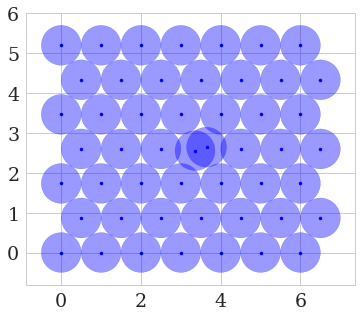

In [17]:
ut.plot_2d_population(sheet)

In [18]:
ts, history = models_ef[force].simulate(sheet, t_data, params[force], {"eps": eps, 'jacobian': models_ef[force].jacobian, 'force_args': params[force]}, seed=seed)


DEBUG:root:Starting new simulation
DEBUG:root:Calling solver with: t0=0, tf=20
DEBUG:root:Using EF, global adaptive time stepping with Jacobian and eps=0.01
DEBUG:root:t=0.0
DEBUG:root:t=0.010130506307834507
DEBUG:root:t=0.02422510621608675
DEBUG:root:t=0.04494929803547695
DEBUG:root:t=0.07909625493114693
DEBUG:root:t=0.13961075912091883
DEBUG:root:t=0.2084412655593867
DEBUG:root:t=0.2838406679056279
DEBUG:root:t=0.36487455277886743
DEBUG:root:t=0.45019409481557976
DEBUG:root:t=0.5389167048707113
DEBUG:root:t=0.6303506707283812
DEBUG:root:t=0.7240025076780355
DEBUG:root:t=0.8194781274019911
DEBUG:root:t=0.9164726699027905
DEBUG:root:t=1.014741121368994
DEBUG:root:t=1.1140542168971088
DEBUG:root:t=1.214252490444319
DEBUG:root:t=1.3152053524602993
DEBUG:root:t=1.4168042396728984
DEBUG:root:t=1.5189579265299813
DEBUG:root:t=1.6215890523293846
DEBUG:root:t=1.7246315957109724
DEBUG:root:t=1.8280296709154107
DEBUG:root:t=1.9317393196606787
DEBUG:root:t=2.035723791284922
DEBUG:root:t=2.139951

In [19]:
ts, history = models_ef[force].simulate(sheet, t_data, params[force], {"eps": eps, 'jacobian': models_ef[force].jacobian, 'force_args': params[force], 'local_adaptivity': True}, seed=seed)


DEBUG:root:Starting new simulation
DEBUG:root:Calling solver with: t0=0, tf=20
DEBUG:root:Using EF, local adaptive time stepping with eps=0.01, eta=0.001, m0=2 and m1=2
DEBUG:root:t=0.0
DEBUG:root:Three levels. i_min^1=2, i_min^2=4, dt_0=0.0050652531539172535, dt_1=0.010130506307834507, dt_2=0.020261012615669014
DEBUG:root:y=[-1.60271479e-18 -2.77598345e-18  5.00000000e-01  8.66025404e-01
  1.60271479e-18  1.73205081e+00  5.00000000e-01  2.59807621e+00
 -6.41085917e-18  3.46410162e+00  5.00000000e-01  4.33012702e+00
  6.41085917e-18  5.19615242e+00  1.00000000e+00 -5.55196690e-18
  1.50000000e+00  8.66025404e-01  1.00000000e+00  1.73205081e+00
  1.50000000e+00  2.59807621e+00  1.00000000e+00  3.46410162e+00
  1.50000000e+00  4.33012702e+00  1.00000000e+00  5.19615242e+00
  2.00000000e+00 -5.55196690e-18  2.50000000e+00  8.66025404e-01
  2.00000000e+00  1.73205081e+00  2.49530497e+00  2.59849338e+00
  2.00000000e+00  3.46410162e+00  2.50000000e+00  4.33012702e+00
  2.00000000e+00  5.196

DEBUG:root:t=0.26919887776516227
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=0.34028705354185773, dt_s=0.08047081721639264, K=5
DEBUG:root:y=[-3.36241151e-06 -2.78680803e-06  4.99879711e-01  8.65928335e-01
 -1.25624188e-04  1.73195210e+00  4.95705307e-01  2.59806586e+00
 -1.51247551e-04  3.46420016e+00  4.99889626e-01  4.33023540e+00
 -2.75318819e-06  5.19615536e+00  9.99923398e-01 -5.58627054e-05
  1.49887030e+00  8.65281429e-01  9.98637553e-01  1.73042977e+00
  1.46338862e+00  2.59810844e+00  9.98301903e-01  3.46574977e+00
  1.49918159e+00  4.33178765e+00  9.99953439e-01  5.19624576e+00
  1.99915169e+00 -1.55618114e-03  2.49248845e+00  8.51833377e-01
  1.99571386e+00  1.72584828e+00  2.35197774e+00  2.61531464e+00
  1.99309383e+00  3.47925991e+00  2.50130114e+00  4.32878667e+00
  2.00008919e+00  5.19602340e+00  3.00014206e+00 -1.29878166e-03
  3.50541966e+00  8.57262631e-01  2.97699839e+00  1.65454828e+00
  3.85827504e+00  2.71313960e+00  3.011776

DEBUG:root:t=0.7077660416829624
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=0.859643678145907, dt_s=0.0953257119380898, K=5
DEBUG:root:y=[-6.43841617e-04 -5.39309560e-04  4.97198859e-01  8.63806559e-01
 -3.99227382e-03  1.72892666e+00  4.71893038e-01  2.59811882e+00
 -4.21504721e-03  3.46728261e+00  4.97654087e-01  4.33266697e+00
 -4.72019022e-04  5.19670927e+00  9.97950608e-01 -1.77331566e-03
  1.49366042e+00  8.60391895e-01  9.90203938e-01  1.72493085e+00
  1.42339448e+00  2.59908476e+00  9.89581276e-01  3.47221454e+00
  1.49596107e+00  4.33866083e+00  9.99031050e-01  5.19851163e+00
  1.99416181e+00 -1.29535345e-02  2.48118822e+00  8.28223071e-01
  1.98516226e+00  1.72044233e+00  2.31596654e+00  2.62171994e+00
  1.98282434e+00  3.49185787e+00  2.50329340e+00  4.32734950e+00
  2.00026291e+00  5.19619531e+00  3.00119384e+00 -9.82668589e-03
  3.51009155e+00  8.46808276e-01  2.95986257e+00  1.62005941e+00
  3.87113060e+00  2.73908795e+00  3.01823876e+

DEBUG:root:t=1.197502723852937
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=1.4480249053770344, dt_s=0.10090218598884568, K=5
DEBUG:root:y=[-3.35189463e-03 -2.72385519e-03  4.92665713e-01  8.60228456e-01
 -1.22314239e-02  1.72292828e+00  4.51319865e-01  2.59844799e+00
 -1.23385484e-02  3.47380425e+00  4.94322899e-01  4.33693485e+00
 -2.17216612e-03  5.19905924e+00  9.93833461e-01 -5.73423727e-03
  1.48815752e+00  8.54691292e-01  9.80532232e-01  1.72238938e+00
  1.40611460e+00  2.59984427e+00  9.80337759e-01  3.47575802e+00
  1.49276741e+00  4.34309612e+00  9.97497236e-01  5.20272543e+00
  1.98857282e+00 -2.78408356e-02  2.47222721e+00  8.10498167e-01
  1.97619142e+00  1.71777796e+00  2.30741051e+00  2.62428576e+00
  1.97570191e+00  3.49554326e+00  2.50395308e+00  4.32631752e+00
  1.99974366e+00  5.19701535e+00  3.00157195e+00 -2.04999161e-02
  3.51085403e+00  8.38871790e-01  2.94789989e+00  1.59825856e+00
  3.87117031e+00  2.76090875e+00  3.02218047e

DEBUG:root:t=1.707719801304421
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=1.9053721042947063, dt_s=0.10338644356826408, K=5
DEBUG:root:y=[-7.52601927e-03 -5.95218722e-03  4.87911444e-01  8.56554379e-01
 -2.07302334e-02  1.71753552e+00  4.37630613e-01  2.59880680e+00
 -2.03507715e-02  3.48015090e+00  4.91286540e-01  4.34113391e+00
 -4.32847602e-03  5.20269057e+00  9.88977497e-01 -1.03869461e-02
  1.48286494e+00  8.49396279e-01  9.72067955e-01  1.72091076e+00
  1.39742087e+00  2.60003502e+00  9.72600383e-01  3.47740669e+00
  1.48988269e+00  4.34519112e+00  9.95946739e-01  5.20665629e+00
  1.98332840e+00 -4.10873148e-02  2.46516821e+00  7.96857724e-01
  1.96882824e+00  1.71495297e+00  2.30567965e+00  2.62401688e+00
  1.97075660e+00  3.49606666e+00  2.50403594e+00  4.32553507e+00
  1.99877590e+00  5.19740185e+00  3.00114604e+00 -3.01136460e-02
  3.51036583e+00  8.32372486e-01  2.93940253e+00  1.58401997e+00
  3.86899644e+00  2.77547163e+00  3.02448195e

  6.01754728e+00  5.21149909e+00  3.13456078e+00  2.41260106e+00]
DEBUG:root:t=2.2274628723381538
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=2.600079305824182, dt_s=0.1046414256212901, K=5
DEBUG:root:y=[-1.22606862e-02 -9.44834223e-03  4.83158504e-01  8.53142015e-01
 -2.79600989e-02  1.71360447e+00  4.28385066e-01  2.59906502e+00
 -2.68338535e-02  3.48508939e+00  4.88570340e-01  4.34465336e+00
 -6.25168127e-03  5.20671389e+00  9.83992066e-01 -1.49302743e-02
  1.47795286e+00  8.44480877e-01  9.65034767e-01  1.71947797e+00
  1.39216694e+00  2.59964680e+00  9.66586938e-01  3.47821289e+00
  1.48746569e+00  4.34598297e+00  9.94602633e-01  5.20961443e+00
  1.97862579e+00 -5.16724359e-02  2.45980548e+00  7.86631662e-01
  1.96252585e+00  1.71163236e+00  2.30538365e+00  2.62202165e+00
  1.96727839e+00  3.49524765e+00  2.50399812e+00  4.32488287e+00
  1.99777525e+00  5.19722291e+00  3.00033485e+00 -3.79832384e-02
  3.50937083e+00  8.27424331e-01  2.93302121e

  6.02309526e+00  5.21654786e+00  3.13699490e+00  2.40604591e+00]
DEBUG:root:t=2.752225868640263
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=3.2822798517493466, dt_s=0.10533742249921253, K=5
DEBUG:root:y=[-1.70659465e-02 -1.28362480e-02  4.78526491e-01  8.50047627e-01
 -3.38681966e-02  1.71084260e+00  4.21836118e-01  2.59916131e+00
 -3.17725403e-02  3.48866017e+00  4.86181153e-01  4.34739978e+00
 -7.70141149e-03  5.21059591e+00  9.79172929e-01 -1.91150983e-02
  1.47343466e+00  8.39946100e-01  9.59170180e-01  1.71788341e+00
  1.38843269e+00  2.59881162e+00  9.62051305e-01  3.47855811e+00
  1.48555084e+00  4.34601888e+00  9.93575892e-01  5.21160489e+00
  1.97450053e+00 -5.98435054e-02  2.45559433e+00  7.78979071e-01
  1.95691378e+00  1.70807604e+00  2.30516287e+00  2.61910698e+00
  1.96486418e+00  3.49382205e+00  2.50404422e+00  4.32420557e+00
  1.99697691e+00  5.19663330e+00  2.99937564e+00 -4.40937033e-02
  3.50816719e+00  8.23906123e-01  2.92779136

  6.02820882e+00  5.22126085e+00  3.13890045e+00  2.40170522e+00]
DEBUG:root:t=3.2797517374601193
DEBUG:root:Stopped updating Jacobian at t=3.2797517374601193. Using dt_s=0.10535404149875474
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=3.9673313901854645, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-2.17053372e-02 -1.59803599e-02  4.74106232e-01  8.47244121e-01
 -3.87504146e-02  1.70884175e+00  4.16976002e-01  2.59907944e+00
 -3.54667093e-02  3.49116500e+00  4.84168524e-01  4.34944887e+00
 -8.64545835e-03  5.21407752e+00  9.74650751e-01 -2.29027401e-02
  1.46926124e+00  8.35807894e-01  9.54167897e-01  1.71616746e+00
  1.38551005e+00  2.59767624e+00  9.58668481e-01  3.47858542e+00
  1.48411973e+00  4.34557640e+00  9.92906844e-01  5.21280446e+00
  1.97088534e+00 -6.61244512e-02  2.45210895e+00  7.73238969e-01
  1.95178951e+00  1.70451537e+00  2.30479462e+00  2.61572117e+00
  1.96323299e+00  3.49208539e+00  2.50423725e+00  4.32340182e+00
  1.99646994e+0

DEBUG:root:t=3.8065219449538934
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=4.613628765921981, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-2.60656315e-02 -1.88497024e-02  4.69948986e-01  8.44697701e-01
 -4.28902965e-02  1.70730800e+00  4.13225951e-01  2.59883233e+00
 -3.82112813e-02  3.49288702e+00  4.82563673e-01  4.35091140e+00
 -9.12608901e-03  5.21705273e+00  9.70475542e-01 -2.63137369e-02
  1.46538664e+00  8.32066713e-01  9.49795008e-01  1.71440909e+00
  1.38310209e+00  2.59635344e+00  9.56159695e-01  3.47836358e+00
  1.48312769e+00  4.34480682e+00  9.92590375e-01  5.21339560e+00
  1.96770198e+00 -7.09749283e-02  2.44908340e+00  7.68929370e-01
  1.94703680e+00  1.70108608e+00  2.30429453e+00  2.61211271e+00
  1.96217476e+00  3.49016854e+00  2.50457868e+00  4.32243450e+00
  1.99626422e+00  5.19466611e+00  2.99732790e+00 -5.19495487e-02
  3.50550067e+00  8.20235901e-01  2.91909155e+00  1.56271799e+00
  3.86399977e+00  2.79706389e+00  3.02785857e

DEBUG:root:t=4.333292152447667
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=5.341679734678019, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-3.01295245e-02 -2.14756407e-02  4.66041754e-01  8.42361408e-01
 -4.65237626e-02  1.70605081e+00  4.10211759e-01  2.59844455e+00
 -4.02563142e-02  3.49405433e+00  4.81353243e-01  4.35190219e+00
 -9.21084658e-03  5.21952052e+00  9.66626576e-01 -2.94057447e-02
  1.46174751e+00  8.28678506e-01  9.45859360e-01  1.71265650e+00
  1.38104207e+00  2.59491063e+00  9.54295028e-01  3.47793698e+00
  1.48251190e+00  4.34379708e+00  9.92594145e-01  5.21353005e+00
  1.96485984e+00 -7.47777279e-02  2.44634121e+00  7.65670387e-01
  1.94254971e+00  1.69782986e+00  2.30370707e+00  2.60839856e+00
  1.96152950e+00  3.48812743e+00  2.50505313e+00  4.32129732e+00
  1.99633368e+00  5.19340922e+00  2.99627849e+00 -5.42366287e-02
  3.50408470e+00  8.19632532e-01  2.91518915e+00  1.56124797e+00
  3.86343050e+00  2.79891960e+00  3.02841569e+

DEBUG:root:t=4.860062359941441
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=6.087125311665479, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-3.39040316e-02 -2.38965122e-02  4.62360585e-01  8.40199925e-01
 -4.98071709e-02  1.70496132e+00  4.07702694e-01  2.59794298e+00
 -4.17799835e-02  3.49482605e+00  4.80506654e-01  4.35251293e+00
 -8.96459088e-03  5.22151296e+00  9.63073782e-01 -3.22272620e-02
  1.45829888e+00  8.25599240e-01  9.42234048e-01  1.71093808e+00
  1.37923184e+00  2.59339069e+00  9.52912069e-01  3.47734007e+00
  1.48221411e+00  4.34260369e+00  9.92878837e-01  5.21331798e+00
  1.96229081e+00 -7.78026662e-02  2.44378102e+00  7.63195145e-01
  1.93826071e+00  1.69475634e+00  2.30306647e+00  2.60464502e+00
  1.96118678e+00  3.48599567e+00  2.50564233e+00  4.32000206e+00
  1.99664356e+00  5.19201549e+00  2.99521695e+00 -5.57437744e-02
  3.50261926e+00  8.19610747e-01  2.91143132e+00  1.56045994e+00
  3.86297355e+00  2.80022323e+00  3.02896662e+

DEBUG:root:t=5.386832567435215
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=6.910195324020239, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-3.74110795e-02 -2.61510656e-02  4.58875126e-01  8.38183831e-01
 -5.28462994e-02  1.70397684e+00  4.05547509e-01  2.59735248e+00
 -4.29119894e-02  3.49531433e+00  4.79983259e-01  4.35281765e+00
 -8.44557781e-03  5.22307903e+00  9.59781757e-01 -3.48208903e-02
  1.45500550e+00  8.22784832e-01  9.38831883e-01  1.70926680e+00
  1.37760524e+00  2.59182071e+00  9.51892945e-01  3.47660213e+00
  1.48218173e+00  4.34126679e+00  9.93403977e-01  5.21284016e+00
  1.95994104e+00 -8.02455597e-02  2.44134183e+00  7.61308419e-01
  1.93412367e+00  1.69185742e+00  2.30239330e+00  2.60089032e+00
  1.96106815e+00  3.48379646e+00  2.50632909e+00  4.31856768e+00
  1.99715831e+00  5.19050860e+00  2.99414523e+00 -5.66489544e-02
  3.50110742e+00  8.20038308e-01  2.90776240e+00  1.56016222e+00
  3.86259561e+00  2.80114101e+00  3.02951948e+

DEBUG:root:t=5.9136027749289894
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=7.8383358967241215, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-0.04067861 -0.02827393  0.45555505  0.83628855 -0.05571254  1.70306096
  0.40364431  2.59669414 -0.04374736  3.49559834  0.47973965  4.35287597
 -0.00770393  5.22427284  0.95671521 -0.03722316  1.45183984  0.82019477
  0.93559312  1.70764641  1.37611517  2.59021837  0.95115113  3.47574851
  1.48236881  4.33981695  0.99413148  5.21215658  1.95776788 -0.08224962
  2.4389862   0.75986579  1.93010789  1.68911795  2.30169867  2.59715837
  1.96111673  3.48154813  2.50709797  4.31701551  1.99784497  5.18890836
  2.99306517 -0.05709205  3.49955354  0.82081101  2.90415172  1.56021939
  3.86227681  2.80178416  3.03007636  3.41755184  3.50626122  4.37413418
  2.99423163  5.21460506  4.00866866 -0.01904396  4.49795151  0.88015655
  3.97730496  1.77876539  4.70643839  2.60082548  4.10513287  3.63471681
  4.56766207  4.43619

DEBUG:root:t=6.545727023921518
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=9.14972913291876, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-4.43243645e-02 -3.06879936e-02  4.51751284e-01  8.34145122e-01
 -5.89903349e-02  1.70202270e+00  4.01596133e-01  2.59583836e+00
 -4.44560019e-02  3.49574742e+00  4.79757704e-01  4.35268776e+00
 -6.57899371e-03  5.22528861e+00  9.53287344e-01 -3.98963799e-02
  1.44817994e+00  8.17333438e-01  9.31865987e-01  1.70576731e+00
  1.37445970e+00  2.58826966e+00  9.50537431e-01  3.47460206e+00
  1.48282774e+00  4.33796231e+00  9.95223659e-01  5.21112805e+00
  1.95534603e+00 -8.42220203e-02  2.43623759e+00  7.58571052e-01
  1.92542207e+00  1.68601753e+00  2.30084475e+00  2.59273301e+00
  1.96133707e+00  3.47880706e+00  2.50810947e+00  4.31502744e+00
  1.99885486e+00  5.18688913e+00  2.99176060e+00 -5.71655216e-02
  3.49764156e+00  8.22078920e-01  2.89987556e+00  1.56061976e+00
  3.86195706e+00  2.80230098e+00  3.03074837e+0

  6.05244774e+00  5.24675830e+00  3.14515742e+00  2.39260894e+00]
DEBUG:root:t=7.0724972314152925
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=10.109433402922821, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-4.71652932e-02 -3.26153138e-02  4.48705433e-01  8.32448572e-01
 -6.16234782e-02  1.70119331e+00  4.00030435e-01  2.59508576e+00
 -4.48618477e-02  3.49575754e+00  4.79986635e-01  4.35236067e+00
 -5.48626707e-03  5.22584491e+00  9.50607515e-01 -4.19791184e-02
  1.44522713e+00  8.15120268e-01  9.28862003e-01  1.70425173e+00
  1.37316213e+00  2.58663420e+00  9.50200702e-01  3.47356662e+00
  1.48336655e+00  4.33634457e+00  9.96281619e-01  5.21013799e+00
  1.95345187e+00 -8.55949724e-02  2.43399594e+00  7.57763294e-01
  1.92161527e+00  1.68357147e+00  2.30011989e+00  2.58910381e+00
  1.96161912e+00  3.47650293e+00  2.50901171e+00  4.31328992e+00
  1.99982162e+00  5.18514219e+00  2.99066829e+00 -5.69419690e-02
  3.49601680e+00  8.23343936e-01  2.8963542

DEBUG:root:t=7.599267438909067
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=11.11286573153875, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-4.98531250e-02 -3.44844607e-02  4.45753346e-01  8.30819281e-01
 -6.41884862e-02  1.70038810e+00  3.98558492e-01  2.59430801e+00
 -4.51406013e-02  3.49569331e+00  4.80374044e-01  4.35191173e+00
 -4.28271349e-03  5.22618350e+00  9.48062716e-01 -4.39519797e-02
  1.44235016e+00  8.13037442e-01  9.25932799e-01  1.70277744e+00
  1.37192069e+00  2.58499526e+00  9.49984524e-01  3.47247506e+00
  1.48401760e+00  4.33467920e+00  9.97446645e-01  5.20905607e+00
  1.95164843e+00 -8.67818990e-02  2.43178999e+00  7.57139487e-01
  1.91789195e+00  1.68123639e+00  2.29938552e+00  2.58553868e+00
  1.96196535e+00  3.47419368e+00  2.50995567e+00  4.31149895e+00
  2.00087876e+00  5.18335189e+00  2.98957287e+00 -5.65272798e-02
  3.49437132e+00  8.24744121e-01  2.89287338e+00  1.56179318e+00
  3.86155760e+00  2.80277241e+00  3.03186554e+

DEBUG:root:t=8.12603764640284
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.26678752612392, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-5.24090100e-02 -3.63082065e-02  4.42881586e-01  8.29246721e-01
 -6.66977091e-02  1.69960204e+00  3.97158136e-01  2.59351274e+00
 -4.53210502e-02  3.49557433e+00  4.80890698e-01  4.35136595e+00
 -2.99181719e-03  5.22634186e+00  9.45633119e-01 -4.58313468e-02
  1.43954080e+00  8.11066074e-01  9.23068248e-01  1.70134046e+00
  1.37072347e+00  2.58335823e+00  9.49861549e-01  3.47134061e+00
  1.48475723e+00  4.33298067e+00  9.98696745e-01  5.20790411e+00
  1.94991968e+00 -8.78244070e-02  2.42961544e+00  7.56655867e-01
  1.91425066e+00  1.67900157e+00  2.29864408e+00  2.58204632e+00
  1.96235754e+00  3.47189026e+00  2.51093098e+00  4.30967161e+00
  2.00200729e+00  5.18153121e+00  2.98847578e+00 -5.59702885e-02
  3.49271271e+00  8.26239022e-01  2.88943840e+00  1.56252023e+00
  3.86141921e+00  2.80289888e+00  3.03241655e+0

DEBUG:root:t=8.652807853896615
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=13.597374075992253, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-5.48508208e-02 -3.80956743e-02  4.40080263e-01  8.27722688e-01
 -6.91584874e-02  1.69883175e+00  3.95814043e-01  2.59270591e+00
 -4.54253349e-02  3.49541484e+00  4.81511346e-01  4.35074391e+00
 -1.63329660e-03  5.22635226e+00  9.43302554e-01 -4.76302105e-02
  1.43679346e+00  8.09191260e-01  9.20262673e-01  1.69993739e+00
  1.36956236e+00  2.58172780e+00  9.49810494e-01  3.47017456e+00
  1.48556538e+00  4.33126159e+00  1.00001287e+00  5.20670004e+00
  1.94825310e+00 -8.87537584e-02  2.42747042e+00  7.56279223e-01
  1.91069241e+00  1.67685852e+00  2.29789832e+00  2.57863446e+00
  1.96278144e+00  3.46960257e+00  2.51192819e+00  4.30782340e+00
  2.00319054e+00  5.17969207e+00  2.98737848e+00 -5.53091395e-02
  3.49104849e+00  8.27796042e-01  2.88605670e+00  1.56329806e+00
  3.86132299e+00  2.80298512e+00  3.03295900e

DEBUG:root:t=9.179578061390389
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=13.461404328846008, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-5.71933288e-02 -3.98530089e-02  4.37342465e-01  8.26240968e-01
 -7.15746265e-02  1.69807502e+00  3.94515833e-01  2.59189223e+00
 -4.54705710e-02  3.49522523e+00  4.82214311e-01  4.35006257e+00
 -2.23856616e-04  5.22624220e+00  9.41058091e-01 -4.93586703e-02
  1.43410469e+00  8.07401434e-01  9.17513545e-01  1.69856560e+00
  1.36843209e+00  2.58010823e+00  9.49814736e-01  3.46898660e+00
  1.48642501e+00  4.32953299e+00  1.00137847e+00  5.20545879e+00
  1.94663914e+00 -8.95934342e-02  2.42535483e+00  7.55984317e-01
  1.90721974e+00  1.67480070e+00  2.29715128e+00  2.57531000e+00
  1.96322591e+00  3.46733958e+00  2.51293882e+00  4.30596831e+00
  2.00441390e+00  5.17784543e+00  2.98628249e+00 -5.45736941e-02
  3.48938600e+00  8.29388891e-01  2.88273649e+00  1.56410401e+00
  3.86126993e+00  2.80304836e+00  3.03349082e

DEBUG:root:t=9.706348268884163
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=13.156787961185604, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-5.94484896e-02 -4.15839683e-02  4.34663717e-01  8.24797038e-01
 -7.39474468e-02  1.69733046e+00  3.93256707e-01  2.59107551e+00
 -4.54700391e-02  3.49501311e+00  4.82981062e-01  4.34933599e+00
  1.22221172e-03  5.22603496e+00  9.38889611e-01 -5.10243980e-02
  1.43147273e+00  8.05687769e-01  9.14820540e-01  1.69722317e+00
  1.36732955e+00  2.57850351e+00  9.49861269e-01  3.46778508e+00
  1.48732167e+00  4.32780461e+00  1.00277910e+00  5.20419290e+00
  1.94507061e+00 -9.03610514e-02  2.42326979e+00  7.55751939e-01
  1.90383617e+00  1.67282322e+00  2.29640613e+00  2.57207910e+00
  1.96368227e+00  3.46510935e+00  2.51395531e+00  4.30411881e+00
  2.00566453e+00  5.17600132e+00  2.98518951e+00 -5.37873774e-02
  3.48773223e+00  8.30996359e-01  2.87948610e+00  1.56492076e+00
  3.86126038e+00  2.80310147e+00  3.03401047e

DEBUG:root:t=10.233118476377937
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.911380871874488, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-6.16257770e-02 -4.32904328e-02  4.32041484e-01  8.23387780e-01
 -7.62765456e-02  1.69659732e+00  3.92032442e-01  2.59025890e+00
 -4.54340753e-02  3.49478409e+00  4.83795797e-01  4.34857584e+00
  2.69256611e-03  5.22575008e+00  9.36789375e-01 -5.26330633e-02
  1.42889711e+00  8.04043644e-01  9.12184834e-01  1.69590893e+00
  1.36625311e+00  2.57691739e+00  9.49939913e-01  3.46657728e+00
  1.48824315e+00  4.32608503e+00  1.00420216e+00  5.20291295e+00
  1.94354231e+00 -9.10698118e-02  2.42121723e+00  7.55567427e-01
  1.90054563e+00  1.67092245e+00  2.29566600e+00  2.56894721e+00
  1.96414380e+00  3.46291917e+00  2.51497104e+00  4.30228597e+00
  2.00693116e+00  5.17416884e+00  2.98410135e+00 -5.29686012e-02
  3.48609383e+00  8.32601351e-01  2.87631350e+00  1.56573506e+00
  3.86129368e+00  2.80315379e+00  3.03451684

  6.06572956e+00  5.26492768e+00  3.14714843e+00  2.39190008e+00]
DEBUG:root:t=10.759888683871711
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.731427824744603, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-6.37325285e-02 -4.49728367e-02  4.29474743e-01  8.22011226e-01
 -7.85603617e-02  1.69587532e+00  3.90840641e-01  2.58944511e+00
 -4.53707456e-02  3.49454232e+00  4.84645076e-01  4.34779185e+00
  4.17646004e-03  5.22540394e+00  9.34751631e-01 -5.41887162e-02
  1.42637835e+00  8.02464172e-01  9.09608574e-01  1.69462229e+00
  1.36520216e+00  2.57535344e+00  9.50042700e-01  3.46536956e+00
  1.48917914e+00  4.32438184e+00  1.00563660e+00  5.20162796e+00
  1.94205057e+00 -9.17296069e-02  2.41919962e+00  7.55419545e-01
  1.89735216e+00  1.66909577e+00  2.29493384e+00  2.56591905e+00
  1.96460527e+00  3.46077555e+00  2.51598030e+00  4.30047945e+00
  2.00820394e+00  5.17235620e+00  2.98301998e+00 -5.21318659e-02
  3.48447697e+00  8.34190114e-01  2.8732260

DEBUG:root:t=11.286658891365486
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.615400366783357, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-6.57742834e-02 -4.66305298e-02  4.26963611e-01  8.20666320e-01
 -8.07966012e-02  1.69516456e+00  3.89680170e-01  2.58863650e+00
 -4.52863633e-02  3.49429090e+00  4.85517496e-01  4.34699218e+00
  5.66448008e-03  5.22501015e+00  9.32772244e-01 -5.56941288e-02
  1.42391767e+00  8.00945797e-01  9.07094462e-01  1.69336316e+00
  1.36417678e+00  2.57381506e+00  9.50163389e-01  3.46416754e+00
  1.49012094e+00  4.32270173e+00  1.00707277e+00  5.20034560e+00
  1.94059299e+00 -9.23478617e-02  2.41721969e+00  7.55299629e-01
  1.89425962e+00  1.66734127e+00  2.29421226e+00  2.56299855e+00
  1.96506271e+00  3.45868425e+00  2.51697820e+00  4.29870760e+00
  2.00947433e+00  5.17057072e+00  2.98194752e+00 -5.12886141e-02
  3.48288735e+00  8.35751628e-01  2.87023014e+00  1.56731783e+00
  3.86148094e+00  2.80327941e+00  3.03548712

DEBUG:root:t=11.81342909885926
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.558178458529772, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-6.77550995e-02 -4.82620800e-02  4.24509027e-01  8.19352711e-01
 -8.29825641e-02  1.69446543e+00  3.88550729e-01  2.58783521e+00
 -4.51858884e-02  3.49403225e+00  4.86403403e-01  4.34618370e+00
  7.14835317e-03  5.22458003e+00  9.30848374e-01 -5.71510970e-02
  1.42151674e+00  7.99485947e-01  9.04645443e-01  1.69213185e+00
  1.36317742e+00  2.57230545e+00  9.50297095e-01  3.46297616e+00
  1.49106130e+00  4.32105059e+00  1.00850223e+00  5.19907246e+00
  1.93916815e+00 -9.29301775e-02  2.41528032e+00  7.55200957e-01
  1.89127141e+00  1.66565748e+00  2.29350353e+00  2.56018883e+00
  1.96551306e+00  3.45665030e+00  2.51796068e+00  4.29697749e+00
  2.01073494e+00  5.16881884e+00  2.98088616e+00 -5.04478921e-02
  3.48133008e+00  8.37277119e-01  2.86733130e+00  1.56807249e+00
  3.86162857e+00  2.80335907e+00  3.03595027e

  6.07030027e+00  5.27165288e+00  3.14768617e+00  2.39191432e+00]
DEBUG:root:t=12.340199306353034
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.553380012148864, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-6.96778418e-02 -4.98655250e-02  4.22112484e-01  8.18070568e-01
 -8.51153956e-02  1.69377851e+00  3.87452538e-01  2.58704320e+00
 -4.50732354e-02  3.49376824e+00  4.87294658e-01  4.34537220e+00
  8.62080655e-03  5.22412295e+00  9.28978189e-01 -5.85607013e-02
  1.41917747e+00  7.98082744e-01  9.02264458e-01  1.69092897e+00
  1.36220472e+00  2.57082759e+00  9.50439989e-01  3.46179982e+00
  1.49199417e+00  4.31943355e+00  1.00991767e+00  5.19781418e+00
  1.93777537e+00 -9.34808181e-02  2.41338435e+00  7.55118266e-01
  1.88839038e+00  1.66404321e+00  2.29280948e+00  2.55749217e+00
  1.96595402e+00  3.45467797e+00  2.51892434e+00  4.29529498e+00
  2.01197950e+00  5.16710617e+00  2.97983816e+00 -4.96168579e-02
  3.47980971e+00  8.38759682e-01  2.8645338

  6.07172393e+00  5.27375551e+00  3.14784499e+00  2.39192601e+00]
DEBUG:root:t=12.866969513846808
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.594590732592664, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-7.15444416e-02 -5.14385802e-02  4.19775802e-01  8.16820419e-01
 -8.71922804e-02  1.69310453e+00  3.86386105e-01  2.58626228e+00
 -4.49515111e-02  3.49350044e+00  4.88184429e-01  4.34456260e+00
  1.00754657e-02  5.22364665e+00  9.27160619e-01 -5.99235297e-02
  1.41690187e+00  7.96734771e-01  8.99954256e-01  1.68975529e+00
  1.36125940e+00  2.56938420e+00  9.50589068e-01  3.46064238e+00
  1.49291454e+00  4.31785505e+00  1.01131279e+00  5.19657560e+00
  1.93641454e+00 -9.40030733e-02  2.41153448e+00  7.55047416e-01
  1.88561866e+00  1.66249735e+00  2.29213164e+00  2.55490991e+00
  1.96638387e+00  3.45277076e+00  2.51986644e+00  4.29366479e+00
  2.01320273e+00  5.16543747e+00  2.97880576e+00 -4.88011708e-02
  3.47833013e+00  8.40193982e-01  2.8618411

DEBUG:root:t=13.393739721340582
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.675967962694543, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-7.33561225e-02 -5.29788089e-02  4.17500943e-01  8.15603015e-01
 -8.92105890e-02  1.69244429e+00  3.85352057e-01  2.58549413e+00
 -4.48231962e-02  3.49323018e+00  4.89067017e-01  4.34375908e+00
  1.15067779e-02  5.22315753e+00  9.25395143e-01 -6.12398618e-02
  1.41469187e+00  7.95440886e-01  8.97717257e-01  1.68861171e+00
  1.36034211e+00  2.56797772e+00  9.50741970e-01  3.45950725e+00
  1.49381832e+00  4.31631886e+00  1.01268224e+00  5.19536083e+00
  1.93508595e+00 -9.44995269e-02  2.40973321e+00  7.54985131e-01
  1.88295764e+00  1.66101879e+00  2.29147116e+00  2.55244253e+00
  1.96680133e+00  3.45093143e+00  2.52078479e+00  4.29209058e+00
  2.01440025e+00  5.16381674e+00  2.97779117e+00 -4.80052861e-02
  3.47689461e+00  8.41576014e-01  2.85925531e+00  1.57013861e+00
  3.86223706e+00  2.80367344e+00  3.03724986

DEBUG:root:t=13.920509928834356
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.792495519211936, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-7.51135957e-02 -5.44837609e-02  4.15289857e-01  8.14419218e-01
 -9.11679839e-02  1.69179862e+00  3.84351028e-01  2.58474030e+00
 -4.46902833e-02  3.49295865e+00  4.89937706e-01  4.34296520e+00
  1.29099534e-02  5.22266087e+00  9.23681612e-01 -6.25098174e-02
  1.41254924e+00  7.94200081e-01  8.95555465e-01  1.68749913e+00
  1.35945346e+00  2.56661028e+00  9.50896843e-01  3.45839737e+00
  1.49470223e+00  4.31482807e+00  1.01402149e+00  5.19417338e+00
  1.93379016e+00 -9.49722515e-02  2.40798276e+00  7.54928819e-01
  1.88040792e+00  1.65960630e+00  2.29082896e+00  2.55008960e+00
  1.96720553e+00  3.44916197e+00  2.52167764e+00  4.29057505e+00
  2.01556849e+00  5.16224719e+00  2.97679647e+00 -4.72326791e-02
  3.47550574e+00  8.42902910e-01  2.85677753e+00  1.57075384e+00
  3.86248001e+00  2.80380061e+00  3.03765288

DEBUG:root:t=14.44728013632813
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=12.940042752651614, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-7.68172232e-02 -5.59510818e-02  4.13144370e-01  8.13269909e-01
 -9.30624928e-02  1.69116835e+00  3.83383580e-01  2.58400224e+00
 -4.45543818e-02  3.49268695e+00  4.90792637e-01  4.34218398e+00
  1.42809147e-02  5.22216104e+00  9.22020105e-01 -6.37334703e-02
  1.41047551e+00  7.93011383e-01  8.93470404e-01  1.68641846e+00
  1.35859394e+00  2.56528366e+00  9.51052230e-01  3.45731527e+00
  1.49556363e+00  4.31338519e+00  1.01532681e+00  5.19301613e+00
  1.93252787e+00 -9.54229481e-02  2.40628504e+00  7.54876438e-01
  1.87796932e+00  1.65825852e+00  2.29020571e+00  2.54784990e+00
  1.96759585e+00  3.44746367e+00  2.52254368e+00  4.28912002e+00
  2.01670459e+00  5.16073134e+00  2.97582361e+00 -4.64860146e-02
  3.47416547e+00  8.44172779e-01  2.85440804e+00  1.57133075e+00
  3.86273582e+00  2.80393652e+00  3.03804079e

  6.07696845e+00  5.28145137e+00  3.14838571e+00  2.39195729e+00]
DEBUG:root:t=14.974050343821904
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=13.115317969385622, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-7.84671535e-02 -5.73785975e-02  4.11066088e-01  8.12155917e-01
 -9.48925519e-02  1.69055425e+00  3.82450157e-01  2.58328123e+00
 -4.44167970e-02  3.49241607e+00  4.91628693e-01  4.34141797e+00
  1.56162515e-02  5.22166164e+00  9.20410813e-01 -6.49109320e-02
  1.40847189e+00  7.91873787e-01  8.91463102e-01  1.68537048e+00
  1.35776390e+00  2.56399934e+00  9.51206992e-01  3.45626305e+00
  1.49640051e+00  4.31199214e+00  1.01659520e+00  5.19189150e+00
  1.93129988e+00 -9.58530446e-02  2.40464165e+00  7.54826395e-01
  1.87564098e+00  1.65697391e+00  2.28960191e+00  2.54572146e+00
  1.96797195e+00  3.44583713e+00  2.52338192e+00  4.28772655e+00
  2.01780635e+00  5.15927104e+00  2.97487433e+00 -4.57672785e-02
  3.47287519e+00  8.45384563e-01  2.8521462

DEBUG:root:t=15.500820551315678
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=13.315768235965338, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.00634291e-02 -5.87643759e-02  4.09056333e-01  8.11077968e-01
 -9.66570255e-02  1.68995705e+00  3.81551056e-01  2.58257843e+00
 -4.42785902e-02  3.49214698e+00  4.92443401e-01  4.34066931e+00
  1.69131767e-02  5.22116564e+00  9.18853948e-01 -6.60424085e-02
  1.40653924e+00  7.90786216e-01  8.89534085e-01  1.68435588e+00
  1.35696356e+00  2.56275842e+00  9.51360242e-01  3.45524244e+00
  1.49721133e+00  4.31065027e+00  1.01782428e+00  5.19080138e+00
  1.93010695e+00 -9.62637650e-02  2.40305379e+00  7.54777469e-01
  1.87342137e+00  1.65575077e+00  2.28901789e+00  2.54370167e+00
  1.96833366e+00  3.44428233e+00  2.52419170e+00  4.28639502e+00
  2.01887211e+00  5.15786752e+00  2.97395019e+00 -4.50778810e-02
  3.47163569e+00  8.46537917e-01  2.84999067e+00  1.57237052e+00
  3.86327128e+00  2.80422777e+00  3.03877151

DEBUG:root:t=16.027590758809453
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=13.539459126678663, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.16060709e-02 -6.01067692e-02  4.07116107e-01  8.10036643e-01
 -9.83552062e-02  1.68937739e+00  3.80686415e-01  2.58189487e+00
 -4.41406249e-02  3.49188057e+00  4.93234846e-01  4.33993975e+00
  1.81694816e-02  5.22067548e+00  9.17349673e-01 -6.71282348e-02
  1.40467808e+00  7.89747504e-01  8.87683405e-01  1.68337523e+00
  1.35619303e+00  2.56156167e+00  9.51511293e-01  3.45425479e+00
  1.49799501e+00  4.30936045e+00  1.01901228e+00  5.18974725e+00
  1.92894981e+00 -9.66561780e-02  2.40152234e+00  7.54728745e-01
  1.87130842e+00  1.65458723e+00  2.28845388e+00  2.54178741e+00
  1.96868097e+00  3.44279872e+00  2.52497257e+00  4.28512522e+00
  2.01990071e+00  5.15652146e+00  2.97305250e+00 -4.44187423e-02
  3.47044730e+00  8.47633093e-01  2.84793948e+00  1.57283508e+00
  3.86354464e+00  2.80437979e+00  3.03911457

DEBUG:root:t=16.554360966303218
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=13.784955047055842, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.30951410e-02 -6.14044389e-02  4.05246067e-01  8.09032363e-01
 -9.99868002e-02  1.68881580e+00  3.79856211e-01  2.58123137e+00
 -4.40036027e-02  3.49161766e+00  4.94001593e-01  4.33923072e+00
  1.93834902e-02  5.22019318e+00  9.15898055e-01 -6.81688915e-02
  1.40288855e+00  7.88756392e-01  8.85910667e-01  1.68242889e+00
  1.35545228e+00  2.56040956e+00  9.51659623e-01  3.45330110e+00
  1.49875084e+00  4.30812308e+00  1.02015794e+00  5.18873017e+00
  1.92782909e+00 -9.70312309e-02  2.40004782e+00  7.54679566e-01
  1.86929959e+00  1.65348132e+00  2.28790997e+00  2.53997514e+00
  1.96901403e+00  3.44138528e+00  2.52572434e+00  4.28391647e+00
  2.02089140e+00  5.15523304e+00  2.97218235e+00 -4.37903637e-02
  3.46930990e+00  8.48670840e-01  2.84599015e+00  1.57326448e+00
  3.86381831e+00  2.80453401e+00  3.03944302

  6.08152712e+00  5.28800728e+00  3.14877554e+00  2.39192855e+00]
DEBUG:root:t=17.081131173796983
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=14.051210783637865, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.45307875e-02 -6.26563670e-02  4.03446516e-01  8.08065370e-01
 -1.01551901e-01  1.68827272e+00  3.79060267e-01  2.58058866e+00
 -4.38680914e-02  3.49135903e+00  4.94742622e-01  4.33854335e+00
  2.05540116e-02  5.21972034e+00  9.14499034e-01 -6.91650087e-02
  1.40117046e+00  7.87811533e-01  8.84215078e-01  1.68151709e+00
  1.35474114e+00  2.55930226e+00  9.51804839e-01  3.45238206e+00
  1.49947840e+00  4.30693816e+00  1.02126046e+00  5.18775086e+00
  1.92674527e+00 -9.73897737e-02  2.39863044e+00  7.54629484e-01
  1.86739194e+00  1.65243097e+00  2.28738619e+00  2.53826102e+00
  1.96933305e+00  3.44004060e+00  2.52644699e+00  4.28276769e+00
  2.02184381e+00  5.15400201e+00  2.97134057e+00 -4.31928908e-02
  3.46822301e+00  8.49652310e-01  2.8441398

DEBUG:root:t=17.60790138129075
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=14.337480338813272, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.59132738e-02 -6.38618545e-02  4.01717418e-01  8.07135727e-01
 -1.03050957e-01  1.68774847e+00  3.78298258e-01  2.57996727e+00
 -4.37345478e-02  3.49110535e+00  4.95457264e-01  4.33787848e+00
  2.16802927e-02  5.21925830e+00  9.13152399e-01 -7.01173597e-02
  1.39952330e+00  7.86911509e-01  8.82595490e-01  1.68063989e+00
  1.35405935e+00  2.55823966e+00  9.51946654e-01  3.45149805e+00
  1.50017756e+00  4.30580532e+00  1.02231946e+00  5.18680969e+00
  1.92569872e+00 -9.77325770e-02  2.39727007e+00  7.54578224e-01
  1.86558228e+00  1.65143404e+00  2.28688246e+00  2.53664102e+00
  1.96963836e+00  3.43876293e+00  2.52714069e+00  4.28167747e+00
  2.02275785e+00  5.15282776e+00  2.97052779e+00 -4.26261689e-02
  3.46718583e+00  8.50578978e-01  2.84238531e+00  1.57402453e+00
  3.86435873e+00  2.80484375e+00  3.04005733e

DEBUG:root:t=18.134671588784514
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=14.643244706288275, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.72429958e-02 -6.50205115e-02  4.00058409e-01  8.06243324e-01
 -1.04484734e-01  1.68724327e+00  3.77569724e-01  2.57936758e+00
 -4.36033363e-02  3.49085724e+00  4.96145148e-01  4.33723671e+00
  2.27619701e-02  5.21880810e+00  9.11857784e-01 -7.10268484e-02
  1.39794624e+00  7.86054839e-01  8.81050450e-01  1.67979719e+00
  1.35340654e+00  2.55722140e+00  9.52084863e-01  3.45064921e+00
  1.50084841e+00  4.30472390e+00  1.02333488e+00  5.18590674e+00
  1.92468963e+00 -9.80603453e-02  2.39596633e+00  7.54525651e-01
  1.86386717e+00  1.65048835e+00  2.28639861e+00  2.53511097e+00
  1.96993032e+00  3.43755029e+00  2.52780572e+00  4.28064414e+00
  2.02363372e+00  5.15170932e+00  2.96974440e+00 -4.20897939e-02
  3.46619733e+00  8.51452566e-01  2.84072325e+00  1.57435885e+00
  3.86462245e+00  2.80499699e+00  3.04034392

  6.08451332e+00  5.29221053e+00  3.14897793e+00  2.39186709e+00]
DEBUG:root:t=18.66144179627828
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=14.968156354156996, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.85204894e-02 -6.61322392e-02  3.98468821e-01  8.05387882e-01
 -1.05854272e-01  1.68675722e+00  3.76874088e-01  2.57878984e+00
 -4.34747442e-02  3.49061523e+00  4.96806155e-01  4.33661844e+00
  2.37990232e-02  5.21837054e+00  9.10614663e-01 -7.18944937e-02
  1.39643819e+00  7.85240005e-01  8.79578252e-01  1.67898873e+00
  1.35278224e+00  2.55624694e+00  9.52219332e-01  3.44983544e+00
  1.50149121e+00  4.30369297e+00  1.02430701e+00  5.18504186e+00
  1.92371803e+00 -9.83737275e-02  2.39471856e+00  7.54471736e-01
  1.86224304e+00  1.64959174e+00  2.28593443e+00  2.53366666e+00
  1.97020935e+00  3.43640052e+00  2.52844252e+00  4.27966585e+00
  2.02447183e+00  5.15064551e+00  2.96899059e+00 -4.15831566e-02
  3.46525625e+00  8.52274981e-01  2.83915010

DEBUG:root:t=19.188212003772044
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=15.31199876617337, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-8.97464300e-02 -6.71972076e-02  3.96947714e-01  8.04568974e-01
 -1.07160854e-01  1.68629034e+00  3.76210668e-01  2.57823416e+00
 -4.33489945e-02  3.49037978e+00  4.97440377e-01  4.33602384e+00
  2.47917290e-02  5.21794625e+00  9.09422361e-01 -7.27214116e-02
  1.39499784e+00  7.84465458e-01  8.78176979e-01  1.67821411e+00
  1.35218591e+00  2.55531552e+00  9.52349979e-01  3.44905642e+00
  1.50210637e+00  4.30271137e+00  1.02523634e+00  5.18421466e+00
  1.92278380e+00 -9.86733251e-02  2.39352590e+00  7.54416536e-01
  1.86070621e+00  1.64874201e+00  2.28548962e+00  2.53230391e+00
  1.97047592e+00  3.43531131e+00  2.52905160e+00  4.27874062e+00
  2.02527277e+00  5.14963488e+00  2.96826637e+00 -4.11054839e-02
  3.46436121e+00  8.53048258e-01  2.83766224e+00  1.57494568e+00
  3.86513160e+00  2.80529559e+00  3.04087821e

  6.08630613e+00  5.29469630e+00  3.14907691e+00  2.39181285e+00]
DEBUG:root:t=19.71498221126581
DEBUG:root:Single level, i_min^1=0, i_min^2=0
DEBUG:root:Using EF with with dt_a=15.742334460548022, dt_s=0.10535404149875474, K=5
DEBUG:root:y=[-0.09092163 -0.06821583  0.3954939   0.80378603 -0.10840596  1.68584254
  0.37557869  2.57770052 -0.04322626  3.49015124  0.49804808  4.33545295
  0.02574062  5.21753567  0.90828006 -0.0735088   1.39362367  0.78372964
  0.87684455  1.67747283  1.35161691  2.55442625  0.95247676  3.44831168
  1.50269445  4.30177781  1.02612362  5.18342456  1.92188667 -0.0989597
  2.39238728  0.75436017  1.85925299  1.64793704  2.28506383  2.53101857
  1.97073047  3.43428027  2.52963359  4.27786634  2.02603729  5.14867585
  2.96757158 -0.04065587  3.46351071  0.85377451  2.83625604  1.57520201
  3.8653756   2.80543949  3.04112691  3.39793702  3.54633851  4.33760511
  3.02206317  5.1710138   3.98286697  0.02064783  4.47742268  0.91708989
  3.96901428  1.79734297  4.73